In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("uci_diabetes_sample.csv")
df.head()

Saving uci_diabetes_sample.csv to uci_diabetes_sample (1).csv


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,81,87,22,255,21.9,2.051,24,0
1,3,102,51,16,109,38.6,2.499,20,1
2,7,117,108,45,299,34.7,2.492,64,0
3,4,131,76,54,189,20.7,1.433,40,1
4,6,106,71,29,232,20.3,1.946,63,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           1       0.50      0.88      0.64         8

    accuracy                           0.60        20
   macro avg       0.67      0.65      0.60        20
weighted avg       0.70      0.60      0.59        20



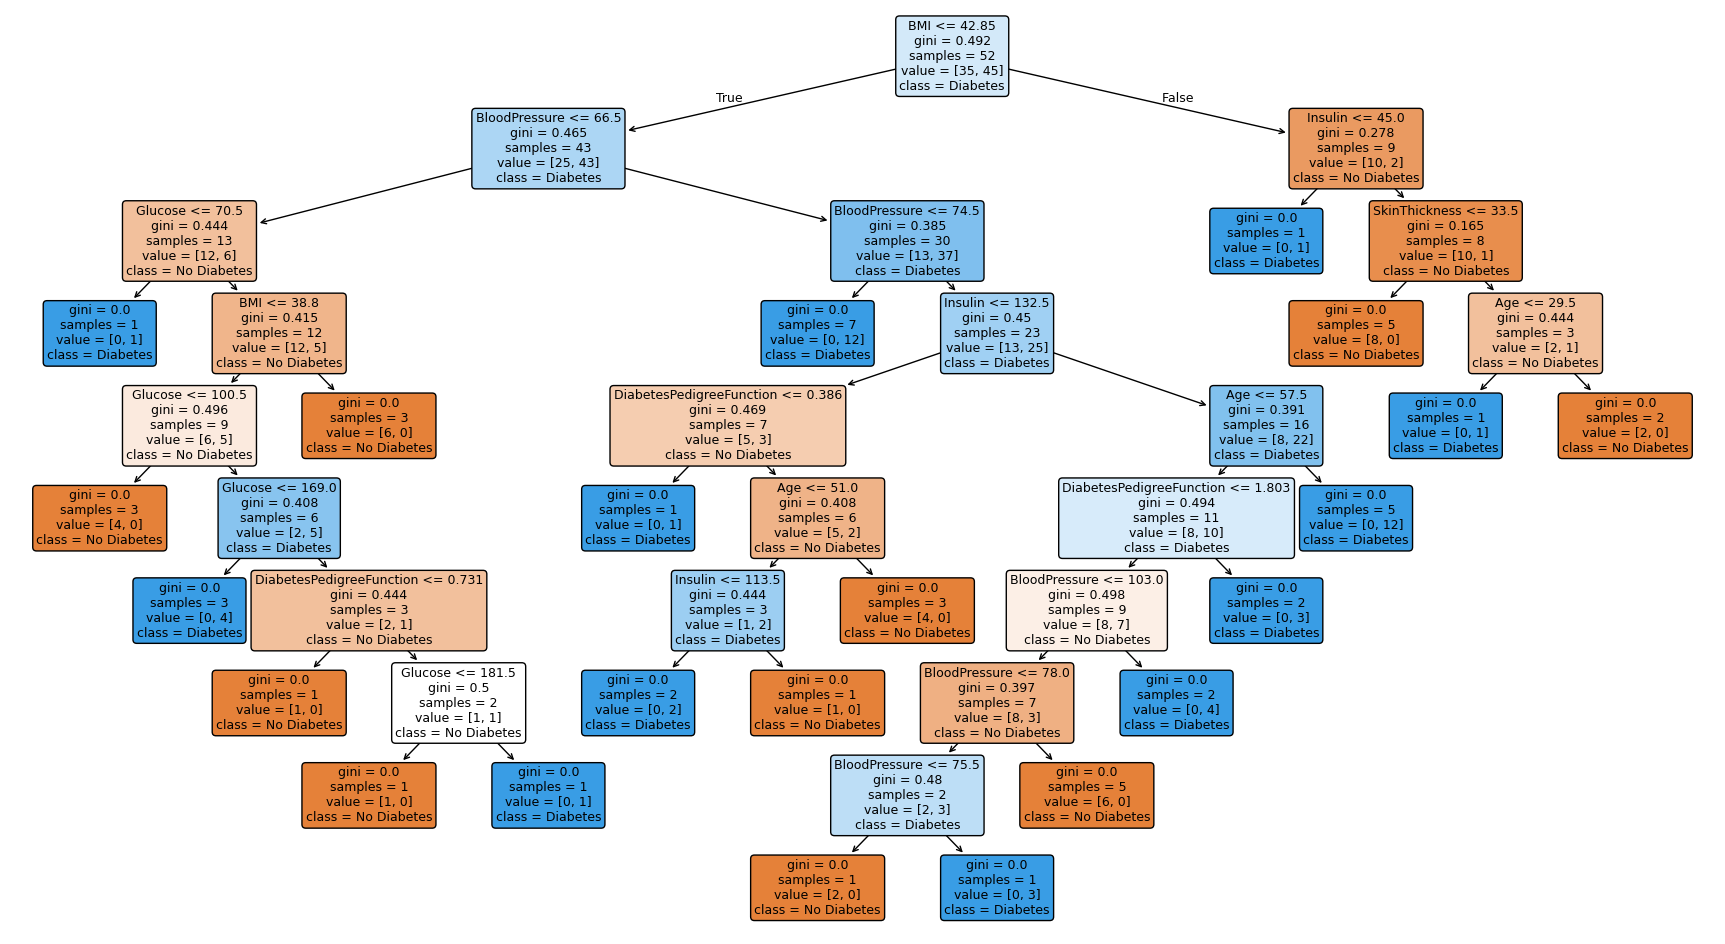

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# extract one tree from the forest
single_tree = rf.estimators_[0]

plt.figure(figsize=(22,12))
plot_tree(
    single_tree,
    feature_names=X.columns,
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.show()